In [21]:
import pandas as pd
import matplotlib.pyplot as plt
data={
    'x':[0,1,2,3,4,5,6,7,8,9],
    'y':[1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0]
}
df=pd.DataFrame(data)
df.head()


,x,y
0,0,1.0
1,1,1.3
2,2,3.1
3,3,2.0
4,4,5.0


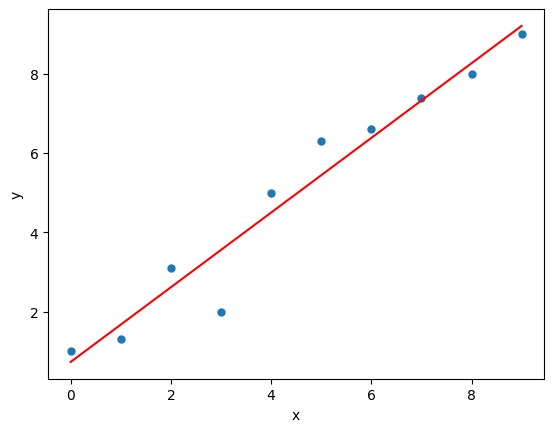

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
x=df['x']
y=df['y']
m, b = np.polyfit(x, y, 1)
plt.plot(x,y,'o',markersize=5)
plt.plot(x,m*x+b,'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['x_std','y_std']]=scaler.fit_transform(df[['x','y']])
print(df.x_std)

0   -1.566699
1   -1.218544
2   -0.870388
3   -0.522233
4   -0.174078
5    0.174078
6    0.522233
7    0.870388
8    1.218544
9    1.566699
Name: x_std, dtype: float64


In [24]:
print(df.y_std)

0   -1.427901
1   -1.319999
2   -0.672588
3   -1.068228
4    0.010790
5    0.478365
6    0.586266
7    0.874005
8    1.089808
9    1.449481
Name: y_std, dtype: float64


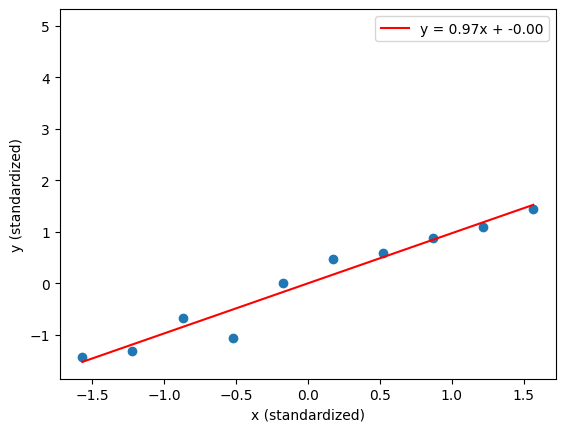

In [25]:
plt.plot(df.x_std,df.y_std,'o',5)
m, b = np.polyfit(df['x_std'], df['y_std'], 1)
plt.plot(df['x_std'], m*df['x_std'] + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')

plt.xlabel('x (standardized)')
plt.ylabel('y (standardized)')
plt.legend()
plt.show()

In [26]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(df[['x_std']],df[['y_std']],test_size=0.3)
x_train.shape


(7, 1)

In [27]:
x_test.shape


(3, 1)

In [29]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² score (accuracy):", r2)


MSE: 0.14380752190335241
RMSE: 0.37921962225516814
MAE: 0.26104368304824793
R² score (accuracy): 0.8682189314332727
